In [32]:
import json
import csv
from PIL import Image, ImageDraw
from torchvision import transforms
from IPython.display import display, Image
import torch.nn as nn

In [4]:
f = open("/data/datasets/fr_shopping.json")
f2 = open("/data/datasets/openimages/train-annotations-bbox.csv")

In [5]:
reader = csv.reader(f2)

In [6]:
for i in reader:
    print(i)
    break

['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin', 'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction', 'IsInside']


In [7]:
i = Image.open("/data/datasets/openimages/images/train/000002b66c9c498e.jpg")

In [8]:
i.width

1024

In [9]:
draw = ImageDraw.Draw(i)
x0 = 355.2
x1 = 395.200512
y0 = 241.600512
y1 = 1024.0
draw.line((x0,y0, x0, y1), fill=128)
draw.line((x0,y1, x1, y1), fill=128)
draw.line((x1,y0, x1, y1), fill=128)
draw.line((x1,y0, x0, y0), fill=128)

In [11]:
%load_ext autoreload

In [12]:
%autoreload 2

In [13]:
normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
prepro = transforms.Compose([
        transforms.RandomResizedCrop(256),

        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])

In [87]:
from dataset import openimages

In [88]:
d = openimages.OpenImages(image_dir="/data/datasets/openimages/images/train/", 
                          image_file="/data/datasets/openimages/train-annotations-human-imagelabels.csv", 
                         classes="/data/datasets/openimages/class-descriptions.csv", 
                          transform=prepro)

In [89]:
len(d)

13444569

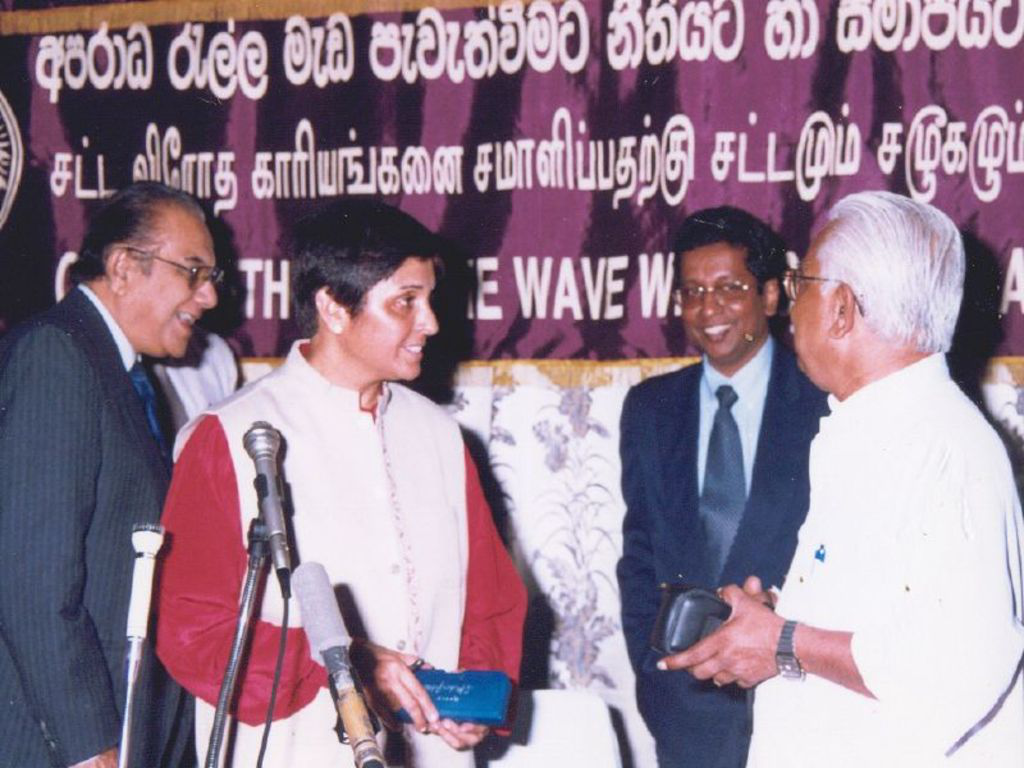

'Electronic device'

In [97]:
i = 503
display(d[i][0])
display(d[i][1])

In [2]:
we = openimages.WordEncoder("/data/datasets/openimages/train-annotations-bbox.csv", "/data/m.portaz/wiki.en.bin")

In [3]:
from models import models

In [4]:
m = models.JointEmbedding(we)

In [6]:
import torchvision.models as tmodels
m = tmodels.resnet152(pretrained=True)

In [13]:
base_layer = nn.Sequential(*list(m.children())[:-1])

In [ ]:
base_layer(t[0])